compilation time: 0.027001619338989258
num is :  8.18


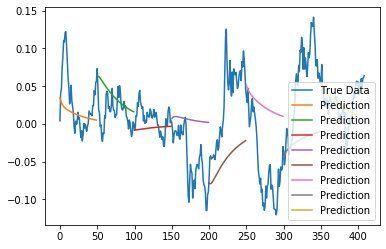

409/409 [==============================] - 1s 3ms/step
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_37 (LSTM)               (None, None, 50)          10400     
_________________________________________________________________
dropout_37 (Dropout)         (None, None, 50)          0         
_________________________________________________________________
lstm_38 (LSTM)               (None, 100)               60400     
_________________________________________________________________
dropout_38 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 101       
_________________________________________________________________
activation_19 (Activation)   (None, 1)                 0         
Total params: 70,901
Trainable params: 70,901
Non-trainable para

In [16]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time
from keras.models import load_model

X_train, y_train, X_test, y_test = lstm.load_data('sp500.csv', 50, True)

#print(X_train, y_train, X_test, y_test)

'''
#init model
model = Sequential();

#히든 레이어를 50개로 설정.
model.add( LSTM( input_dim = 1, output_dim = 300, return_sequences = True ) )
#과대적합을 피하기 위한 20% 버리기
model.add( Dropout( 0.2 ) )

model.add( LSTM( 100, return_sequences = False ) )
model.add( Dropout( 0.2 ) )

model.add( Dense( output_dim = 1 ) )
model.add( Activation( 'linear' ) )
'''

model = load_model("stock_pridict.h5")

start = time.time()
model.compile( loss = 'mse', optimizer = 'rmsprop' )
print( 'compilation time:',time.time()-start )


#train model. until target status.
#model.fit( X_train, y_train, batch_size = 128, epochs = 1, validation_split = 0.02 )


predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)
lstm.plot_results_multiple(predictions, y_test, 50)

model.evaluate( X_test, y_test, batch_size = 128 )
model.summary()


model.save("stock_pridict.h5")